<a href="https://colab.research.google.com/github/Anuj-Gaida/Rice_diseases_detection/blob/classification/initialclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [4]:
import os
import random
import zipfile
import tensorflow as tf
from keras.layers import Input, Lambda, Dense, Flatten,GlobalAveragePooling2D,BatchNormalization,Dropout,Activation
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [5]:
source_path='/content/gdrive/MyDrive/RiceLeafs/RiceLeafs'

In [6]:
# train source
source_path_train_Brownspot = os.path.join(source_path, 'train/BrownSpot')
source_path_train_Healthy   = os.path.join(source_path, 'train/Healthy')
source_path_train_Hispa     = os.path.join(source_path, 'train/Hispa')
source_path_train_LeafBlast = os.path.join(source_path, 'train/LeafBlast')

print(f"There are {len(os.listdir(source_path_train_Brownspot))} images of Train Brown Spot.")
print(f"There are {len(os.listdir(source_path_train_Healthy))} images of Train Healthy.")
print(f"There are {len(os.listdir(source_path_train_Hispa))} images of Train Hispa.")
print(f"There are {len(os.listdir(source_path_train_LeafBlast))} images of Train LeafBlast.\n")

# Validation source
source_path_validation_Brownspot  = os.path.join(source_path, 'validation/BrownSpot')
source_path_validation_Healthy    = os.path.join(source_path, 'validation/Healthy')
source_path_validation_Hispa      = os.path.join(source_path, 'validation/Hispa')
source_path_validation_LeafBlast  = os.path.join(source_path, 'validation/LeafBlast')

print(f"There are {len(os.listdir(source_path_validation_Brownspot))} images of Validation Brown Spot.")
print(f"There are {len(os.listdir(source_path_validation_Healthy))} images of Validation Healthy.")
print(f"There are {len(os.listdir(source_path_validation_Hispa))} images of Validation Hispa.")
print(f"There are {len(os.listdir(source_path_validation_LeafBlast))} images of Validation LeafBlast.\n")


There are 418 images of Train Brown Spot.
There are 1191 images of Train Healthy.
There are 452 images of Train Hispa.
There are 623 images of Train LeafBlast.

There are 105 images of Validation Brown Spot.
There are 297 images of Validation Healthy.
There are 113 images of Validation Hispa.
There are 156 images of Validation LeafBlast.



Sample Testing Healthy Rice Leaf:


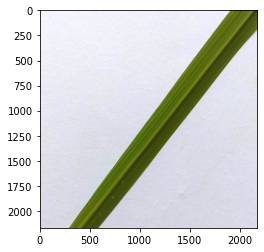

Sample Testing Hispa Rice Leaf:


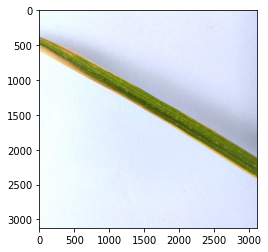

In [7]:
random_number = random.randint(0, len(os.listdir(source_path_validation_Hispa)))
print("Sample Testing Healthy Rice Leaf:")
plt.imshow(load_img(f"{os.path.join(source_path_train_Healthy, os.listdir(source_path_train_Healthy)[random_number])}"))
plt.show()

print("Sample Testing Hispa Rice Leaf:")
plt.imshow(load_img(f"{os.path.join(source_path_train_LeafBlast , os.listdir(source_path_train_LeafBlast )[random_number])}"))
plt.show()

##defining training directory and validation directory


In [8]:
TRAINING_DIR = os.path.join(source_path, 'train')
VALIDATION_DIR = os.path.join(source_path, 'validation')

In [9]:
dataset = []
shape = (224, 224)
count = 0
for file in os.listdir(TRAINING_DIR):
  path = os.path.join(TRAINING_DIR, file)
  time = 0
  for k in os.listdir(path):
    image   = load_img(os.path.join(path, k), grayscale=False, color_mode='rgb', target_size = shape)
    image   = img_to_array(image)
    image   = image/255.0
    dataset += [[image, count]]
    time    +=1
  count = count+1

In [10]:
testset=[]
count=0
for file in os.listdir(VALIDATION_DIR):
    path=os.path.join(VALIDATION_DIR,file)
    t=0
    for im in os.listdir(path):
        image    = load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=shape)
        image    = img_to_array(image)
        image    = image/255.0
        testset  += [[image,count]]
        t        += 1
    count        = count+1

In [11]:
data,trainlabels = zip(*dataset)
test,testlabels = zip(*testset)

labels1 = to_categorical(trainlabels)
labels  = np.array(labels1)

data    = np.array(data)
test    = np.array(test)

trainx, testx, trainy, testy = train_test_split(data,
                                                labels,
                                                test_size=0.2,
                                                random_state=42)

In [12]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(2147, 224, 224, 3)
(537, 224, 224, 3)
(2147, 4)
(537, 4)


In [13]:
train_datagen = ImageDataGenerator(horizontal_flip=True,
                             vertical_flip=True,
                             rotation_range=30,
                             zoom_range=0.2,
                             width_shift_range=0.1,
                             height_shift_range=0.2,
                             shear_range=0.2)

In [14]:
pretrained_model = tf.keras.applications.DenseNet121(input_shape=(224,224,3),
                                                      include_top=False,
                                                      weights='imagenet')


29084464/29084464 [==============================] - 3s 0us/step


In [15]:
pretrained_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                        

In [16]:
inputs = pretrained_model.input
x = tf.keras.layers.Flatten()(pretrained_model.output)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
his=model.fit(train_datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=30, verbose=1)


Epoch 1/30
68/68 [==============================] - 62s 557ms/step - loss: 1.8811 - accuracy: 0.5142 - val_loss: 2.0931 - val_accuracy: 0.4786
Epoch 2/30
68/68 [==============================] - 31s 451ms/step - loss: 1.2029 - accuracy: 0.6479 - val_loss: 1.5211 - val_accuracy: 0.5531
Epoch 3/30
68/68 [==============================] - 31s 454ms/step - loss: 0.9040 - accuracy: 0.7112 - val_loss: 1.2645 - val_accuracy: 0.6145
Epoch 4/30
68/68 [==============================] - 31s 449ms/step - loss: 0.7903 - accuracy: 0.7191 - val_loss: 1.2899 - val_accuracy: 0.5940
Epoch 5/30
68/68 [==============================] - 31s 448ms/step - loss: 0.7491 - accuracy: 0.7327 - val_loss: 1.2398 - val_accuracy: 0.5866
Epoch 6/30
68/68 [==============================] - 31s 449ms/step - loss: 0.6204 - accuracy: 0.7690 - val_loss: 0.8069 - val_accuracy: 0.7151
Epoch 7/30
68/68 [==============================] - 31s 449ms/step - loss: 0.6569 - accuracy: 0.7583 - val_loss: 0.7877 - val_accuracy: 0.7337

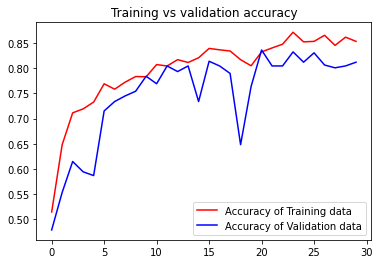

<Figure size 432x288 with 0 Axes>

In [19]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [1]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

NameError: ignored

In [ ]:
import pathlib
tflite_models_dir = pathlib.Path("tflite_models/")
tflite_models_dir.mkdir(exist_ok=True, parents=True)

In [ ]:
tflite_model_file = tflite_models_dir/"model.tflite"
tflite_model_file.write_bytes(tflite_model)

In [ ]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()
tflite_model_quant_file = tflite_models_dir/"model_quant.tflite"
tflite_model_quant_file.write_bytes(tflite_quant_model)

In [ ]:
!ls -lh {tflite_models_dir}